In [4]:
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split,KFold,cross_validate
import numpy as np
from sklearn.metrics import precision_score,roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# import seaborn as sns
import io
# from google.colab import files


# uploaded = files.upload()
# #extract the data
# raw_df = pd.read_csv(io.BytesIO(uploaded['BitcoinHeistData.csv']))


# #extract the data
raw_df = pd.read_csv('~/ML_class_projects/a_1/Skin_NonSkin.txt', delimiter='	')
cleaned_df = raw_df.copy()


cleaned_df['class']=np.array([1 if x==1 else 0 for x in cleaned_df['class']])
print(cleaned_df.head(5))
#summarize data distribution
y=np.array(cleaned_df['class'])
X=np.array(cleaned_df.iloc[:,:-1])
print(Counter(y))

   val1  val2  val3  class
0    74    85   123      1
1    73    84   122      1
2    72    83   121      1
3    70    81   119      1
4    70    81   119      1
Counter({0: 194198, 1: 50859})


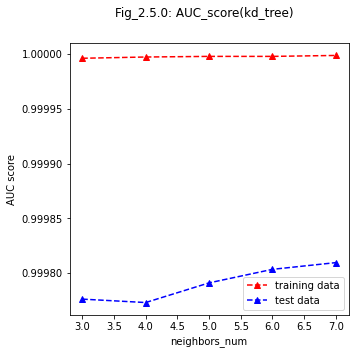

In [5]:
##cross validation to find out the best neighbor number using kd_tree or ball_tree###
t=10
cv = KFold(n_splits=t,shuffle=True)
AUC_train_score_list=[]
AUC_test_score_list=[]

neighbors_num = [3,4,5,6,7]
algorithms = ['kd_tree','ball_tree']
# parameters=(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)[source]
for neighbors in neighbors_num:
    neigh = KNeighborsClassifier(n_neighbors=neighbors,weights='distance',algorithm='kd_tree')
    scores =  cross_validate(neigh, X, y, scoring=['roc_auc'], cv=cv, n_jobs=-1,return_train_score=True)
    AUC_train_score_list.append(sum(scores['train_roc_auc'])/t)
    AUC_test_score_list.append(sum(scores['test_roc_auc'])/t)
    

# #generate Fig_1.5.
fig_0, axs = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
axs.plot(neighbors_num,AUC_train_score_list,"r^",linestyle = "--", label='training data')
axs.plot(neighbors_num,AUC_test_score_list,"b^",linestyle = "--",label='test data')
axs.set_xlabel("neighbors_num")
axs.set_ylabel("AUC score")
axs.legend()
fig_0.suptitle("Fig_2.5.0: AUC_score(kd_tree)")
fig_0.savefig("KNN_fig_2.5_tunning:AUC score.png")

In [7]:
########check if using ball_tree can get higher AUC score######
# neigh = KNeighborsClassifier(n_neighbors=7,weights='distance',algorithm='ball_tree')
# scores =  cross_validate(neigh, X, y, scoring=['roc_auc'], cv=cv, n_jobs=-1,return_train_score=True)
# print("AUC_score on training set if using ball_tree to store:",sum(scores['train_roc_auc'])/t)
# print("AUC_score on test set if using ball_tree to store:",sum(scores['test_roc_auc'])/t)
    

AUC_score on training set if using ball_tree to store: 0.9999985623662683
AUC_score on test set if using ball_tree to store: 0.9998015192002795


In [8]:
 AUC_test_score_list

[0.9997763683233787,
 0.9997732454992363,
 0.9997912028454135,
 0.9998035588786,
 0.9998096997368432]

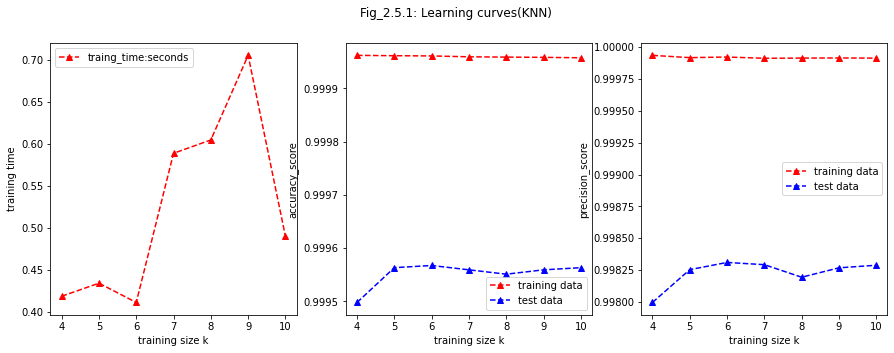

In [10]:
###############Apply neighbors_num and storing methods to train the model##################
Accuracy_train_score=[]
Accuracy_test_score=[]
Precision_test_score=[]
Precision_train_score=[]
training_time = []

for k in range(4,11):
    cv = KFold(n_splits=k,shuffle=True)
    neigh = KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='kd_tree')
    scores =  cross_validate(neigh, X, y, scoring=['accuracy','precision'], cv=cv, n_jobs=-1,return_train_score=True)
    training_time.append(sum(scores['fit_time'])/k)
    Accuracy_train_score.append(sum(scores['train_accuracy'])/k)
    Accuracy_test_score.append(sum(scores['test_accuracy'])/k)
    Precision_train_score.append(sum(scores['train_precision'])/k)
    Precision_test_score.append(sum(scores['test_precision'])/k)
#generate Fig_2.5.1
K= range(4,11)
fig_1, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
axs[0].plot(K,training_time,"r^",linestyle = "--",label="traing_time:seconds")
axs[0].set_xlabel("training size k")
axs[0].set_ylabel("training time")
axs[1].plot(K,Accuracy_train_score,"r^",linestyle = "--",label='training data')
axs[1].plot(K,Accuracy_test_score,"b^",linestyle = "--",label='test data')
axs[1].set_xlabel("training size k")
axs[1].set_ylabel("accuracy_score")
axs[2].plot(K,Precision_train_score,"r^",linestyle = "--",label='training data')
axs[2].plot(K,Precision_test_score,"b^",linestyle = "--",label='test data')
axs[2].set_xlabel("training size k")
axs[2].set_ylabel("precision_score")
axs[0].legend()
axs[1].legend()
axs[2].legend()
fig_1.suptitle("Fig_2.5.1: Learning curves(KNN)")
fig_1.savefig("NN_fig_2.5_trainnig:learning curves.png")
    

In [15]:
##################prediction results, generate the data in table2.5.0#########
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/10, random_state=123)
neigh = KNeighborsClassifier(n_neighbors=7,weights='distance',algorithm='kd_tree')
neigh.fit(X_train,y_train)
y_train_predict=neigh.predict(X_train)
y_test_predict=neigh.predict(X_test)
print("The precision scores on training set and test set are",precision_score(y_train,y_train_predict),precision_score(y_test,y_test_predict))
print("The accuracy scores on training set and test set are",accuracy_score(y_train,y_train_predict),accuracy_score(y_test,y_test_predict))

The precision scores on training set and test set are 0.9999343918120982 0.9986370716510904
The accuracy scores on training set and test set are 0.9999637272104864 0.9996327430017139
